# Diabetes Health Prediction

In [33]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import math
from sklearn import metrics

## Data Extraction

In [34]:
df = pd.read_csv('../input/2020-diabetes-dataset/cleanData.csv')

In [53]:
df.shape
df.head()

,Diabetes,Marital Status,Education Level,Own or Rent Home,Has Phone,Veteran,Employment Status,Children,Household Income,Pregnant,...,Sex,Male Sexual Orientation,Female Sexual Orientation,Transgender,DrunkFamily,DrugsInFamily,Divorced Parents,Primary Language,Urban or Rural,HealthCare
0,1.0,2.0,6.0,1.0,1.0,2.0,4.0,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1,1.0,2.0
1,0.0,1.0,5.0,1.0,1.0,2.0,7.0,0.0,7.0,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1,1.0,1.0
2,1.0,4.0,4.0,3.0,1.0,2.0,8.0,0.0,5.0,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1,1.0,1.0
3,0.0,1.0,4.0,1.0,2.0,2.0,7.0,0.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,1.0
4,1.0,1.0,4.0,1.0,1.0,2.0,7.0,0.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,1.0


In [55]:
df = df.fillna(0)

In [59]:
#transform data
df['Diabetes'] = df['Diabetes'].astype('int')
df['Marital Status'] = df['Marital Status'].astype('int')
df['Education Level'] = df['Education Level'].astype('int')
df['Own or Rent Home'] = df['Own or Rent Home'].astype('int')
df['Has Phone'] = df['Has Phone'].astype('int')
df['Smoker'] = df['Smoker'].astype('int')
df['Veteran'] = df['Veteran'].astype('int')
df['Employment Status'] = df['Employment Status'].astype('int')
df['Children'] = df['Children'].astype('int')
df['Pregnant'] = df['Pregnant'].astype('int')
df['Male Sexual Orientation'] = df['Male Sexual Orientation'].astype('int')

df['Female Sexual Orientation'] = df['Female Sexual Orientation'].astype('int')
df['HealthCare'] = df['HealthCare'].astype('int')
df['Transgender'] = df['Transgender'].astype('int')
df['DrunkFamily'] = df['DrunkFamily'].astype('int')
df['DrugsInFamily'] = df['DrugsInFamily'].astype('int')
df['Divorced Parents'] = df['Divorced Parents'].astype('int')
df['Primary Language'] = df['Primary Language'].astype('int')
df['Urban or Rural'] = df['Urban or Rural'].astype('int')
df['Sex'] = df['Sex'].astype('int')
df['Household Income'] = df['Household Income'].astype('int')
df.head()

,Diabetes,Marital Status,Education Level,Own or Rent Home,Has Phone,Veteran,Employment Status,Children,Household Income,Pregnant,...,Sex,Male Sexual Orientation,Female Sexual Orientation,Transgender,DrunkFamily,DrugsInFamily,Divorced Parents,Primary Language,Urban or Rural,HealthCare
0,1,2,6,1,1,2,4,0,1,0,...,0,0,0,0,1,1,1,1,1,2
1,0,1,5,1,1,2,7,0,7,0,...,0,0,0,0,0,0,1,1,1,1
2,1,4,4,3,1,2,8,0,5,0,...,0,0,0,0,0,0,0,1,1,1
3,0,1,4,1,2,2,7,0,6,0,...,0,0,0,0,0,0,0,1,1,1
4,1,1,4,1,1,2,7,0,5,0,...,0,0,0,0,0,0,0,1,1,1


In [60]:

df.head()

,Diabetes,Marital Status,Education Level,Own or Rent Home,Has Phone,Veteran,Employment Status,Children,Household Income,Pregnant,...,Sex,Male Sexual Orientation,Female Sexual Orientation,Transgender,DrunkFamily,DrugsInFamily,Divorced Parents,Primary Language,Urban or Rural,HealthCare
0,1,2,6,1,1,2,4,0,1,0,...,0,0,0,0,1,1,1,1,1,2
1,0,1,5,1,1,2,7,0,7,0,...,0,0,0,0,0,0,1,1,1,1
2,1,4,4,3,1,2,8,0,5,0,...,0,0,0,0,0,0,0,1,1,1
3,0,1,4,1,2,2,7,0,6,0,...,0,0,0,0,0,0,0,1,1,1
4,1,1,4,1,1,2,7,0,5,0,...,0,0,0,0,0,0,0,1,1,1


In [61]:
df.describe()

,Diabetes,Marital Status,Education Level,Own or Rent Home,Has Phone,Veteran,Employment Status,Children,Household Income,Pregnant,...,Sex,Male Sexual Orientation,Female Sexual Orientation,Transgender,DrunkFamily,DrugsInFamily,Divorced Parents,Primary Language,Urban or Rural,HealthCare
count,310414.000000,310414.000000,310414.000000,310414.000000,310414.000000,310414.000000,310414.000000,310414.000000,310414.000000,310414.000000,...,310414.000000,310414.000000,310414.00000,310414.000000,310414.000000,310414.000000,310414.000000,310414.000000,310414.000000,310414.000000
mean,0.149732,2.287880,5.020666,1.327530,1.390849,1.870583,3.595627,0.548410,5.984031,0.005638,...,0.390282,0.028649,0.04166,0.004372,0.073415,0.032402,0.114895,1.031822,1.126731,1.080299
std,0.356809,1.683994,0.990395,0.551638,1.358361,0.353454,2.816175,1.135208,2.214822,0.074872,...,0.712775,0.277305,0.33465,0.098816,0.260817,0.177065,0.566468,0.178637,0.384282,0.271792
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,1.000000,4.000000,1.000000,1.000000,2.000000,1.000000,0.000000,5.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,0.000000,1.000000,5.000000,1.000000,1.000000,2.000000,2.000000,0.000000,7.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,0.000000,3.000000,6.000000,2.000000,1.000000,2.000000,7.000000,1.000000,8.000000,0.000000,...,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,6.000000,6.000000,3.000000,8.000000,7.000000,8.000000,82.000000,8.000000,1.000000,...,2.000000,4.000000,4.00000,3.000000,1.000000,1.000000,8.000000,20.000000,2.000000,2.000000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310414 entries, 0 to 310413
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Diabetes                   310414 non-null  int64  
 1   Marital Status             310414 non-null  int64  
 2   Education Level            310414 non-null  int64  
 3   Own or Rent Home           310414 non-null  int64  
 4   Has Phone                  310414 non-null  int64  
 5   Veteran                    310414 non-null  int64  
 6   Employment Status          310414 non-null  int64  
 7   Children                   310414 non-null  int64  
 8   Household Income           310414 non-null  int64  
 9   Pregnant                   310414 non-null  int64  
 10  Smoker                     310414 non-null  int64  
 11  Alcohol Consumption        310414 non-null  float64
 12  Depressed                  310414 non-null  float64
 13  Sex                        31

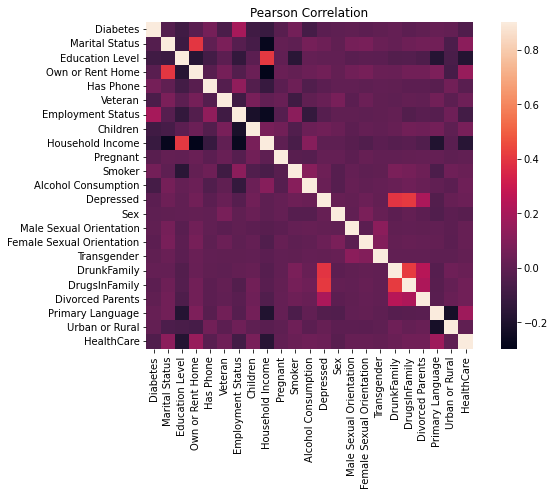

In [63]:
#heatmap correlation
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), vmax = 0.9, square = True)
plt.title("Pearson Correlation")
plt.show()

In [64]:
#split data
X = df.drop('Diabetes', axis = 1)
y = df['Diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(217289, 22)
(217289,)
(93125, 22)
(93125,)


## Random Forest Model

In [65]:
#build model
rf = RandomForestClassifier(random_state = 1, max_features = 'sqrt', n_jobs = 1, verbose = 1)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   35.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.5s finished


0.832

In [66]:
#prediction
y_pred = rf.predict(X_test)
print(y_pred)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[0 0 0 ... 0 0 0]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.4s finished


In [68]:
#check MSE & RMSE 
mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.168
Root Mean Squared Error : 0.40987803063838396


[[76298  2838]
 [12807  1182]]


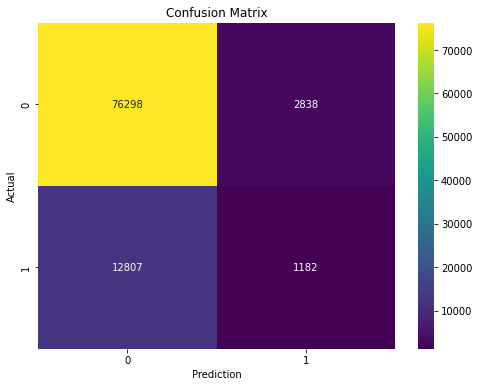

In [69]:
#confusion matrix
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

#heatmap matrix
plt.figure(figsize = (8,6))
sns.heatmap(matrix, annot = True, fmt = ".0f", cmap = 'viridis')
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [70]:
#classification report
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     79136
           1       0.29      0.08      0.13     13989

    accuracy                           0.83     93125
   macro avg       0.58      0.52      0.52     93125
weighted avg       0.77      0.83      0.79     93125



## Check Feature Importance

In [71]:
#defining of feature
feature = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending = False)
print(feature)

Household Income             0.158431
Employment Status            0.123776
Marital Status               0.100239
Education Level              0.094210
Alcohol Consumption          0.086815
Sex                          0.059735
Has Phone                    0.052658
Children                     0.050728
Urban or Rural               0.045710
Own or Rent Home             0.044630
Smoker                       0.033630
Divorced Parents             0.028984
DrunkFamily                  0.022372
Veteran                      0.021556
Depressed                    0.016646
HealthCare                   0.014817
DrugsInFamily                0.011347
Female Sexual Orientation    0.011325
Male Sexual Orientation      0.010356
Primary Language             0.008461
Transgender                  0.002037
Pregnant                     0.001538
dtype: float64


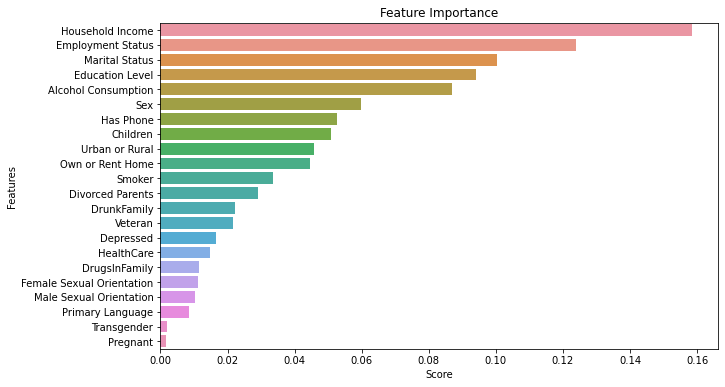

In [72]:
#visualize feature
plt.figure(figsize = (10,6))
sns.barplot(x = feature, y = feature.index)
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


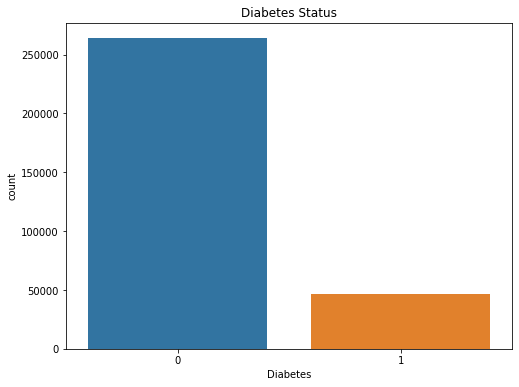

In [73]:
#visualize diabetes status
plt.figure(figsize = (8,6))
sns.countplot(df['Diabetes'])
plt.title("Diabetes Status")
plt.show()